In [100]:
import pandas as pd
import everywhereml

In [101]:
# !pip3 install -U everywhereml

In [123]:
df = pd.read_csv('t_data.csv')

In [124]:
df.head()

,x,y,z,label
0,4929,9.55,3.63,0
1,4449,10.05,3.99,0
2,4513,12.16,4.45,0
3,4673,12.11,4.38,0
4,4705,11.27,4.35,0


In [125]:
# df.Lablel.value_counts()
len(df)

400

In [126]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

In [127]:
from sklearn.model_selection import train_test_split

# Generate X and y
X = df[["x", "y", "z"]].diff().iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [128]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

max_leaf_nodes = 3
clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=max_leaf_nodes)

#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

print(f'Score: {clf.score(X_test, y_test):3.3f}')

Score: 0.250


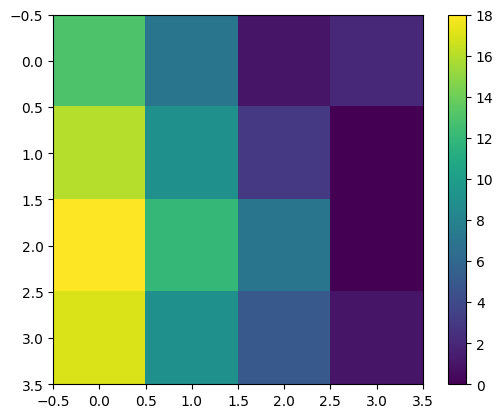

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = y_test
y_pred = clf.predict(X_test)

plt.imshow(confusion_matrix(y_true, y_pred))
plt.colorbar()

In [130]:
clf.to_micropython_file("MyModel.py")

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=None, max_features=sqrt, max_leaf_nodes=3, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=5, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=None, template_folder=everywhereml/sklearn/ensemble

In [131]:
x = [[4865,	11.19,	4.07]]
clf.predict(x)[0]

2

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [133]:
df = pd.read_csv('t_data.csv')

# Prepare the features and target variable
X = df[["x", "y", "z"]].diff().iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [134]:
# Initialize the Random Forest classifier with adjusted hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

Accuracy: 0.425


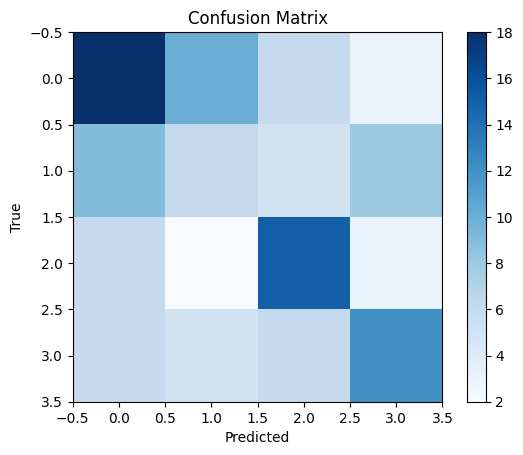

In [135]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.983


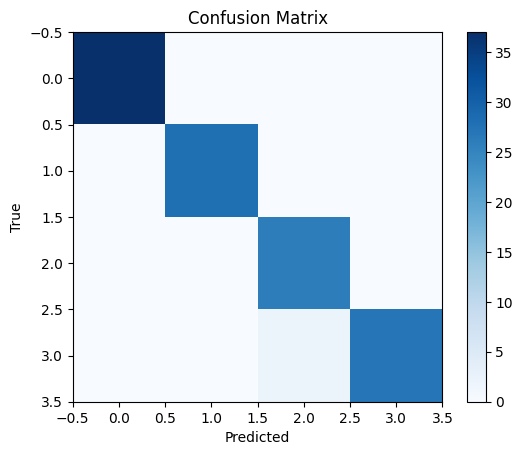

Cross-validation scores: [0.6875     1.         0.925      0.9875     0.98734177]


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('t_data.csv')

# Add derived features
df['vel_x'] = df['x'].diff().fillna(0)
df['vel_y'] = df['y'].diff().fillna(0)
df['vel_z'] = df['z'].diff().fillna(0)

# Prepare the features and target variable
X = df[["x", "y", "z", "vel_x", "vel_y", "vel_z"]].iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with class weights
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')


Accuracy on test set: 0.983


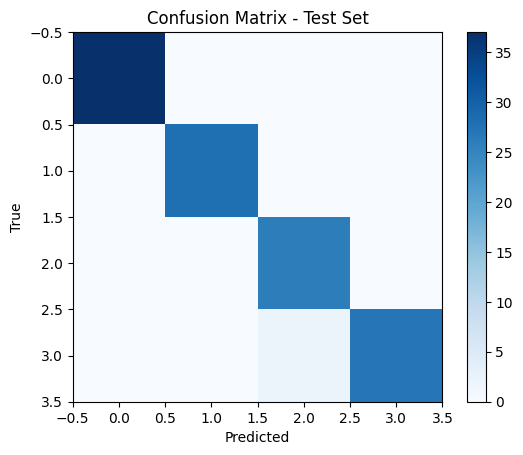

In [137]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


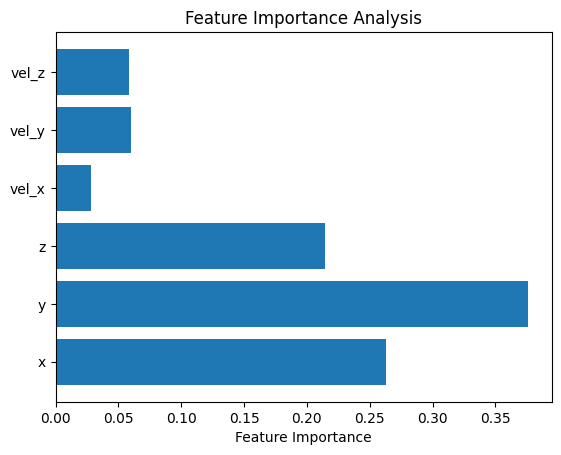

In [138]:
# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "y", "z", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()


Accuracy on test set: 0.983


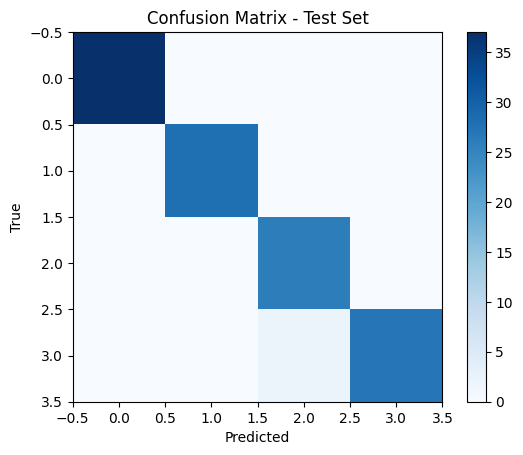

Cross-validation scores: [0.675      1.         0.8875     1.         0.98734177]


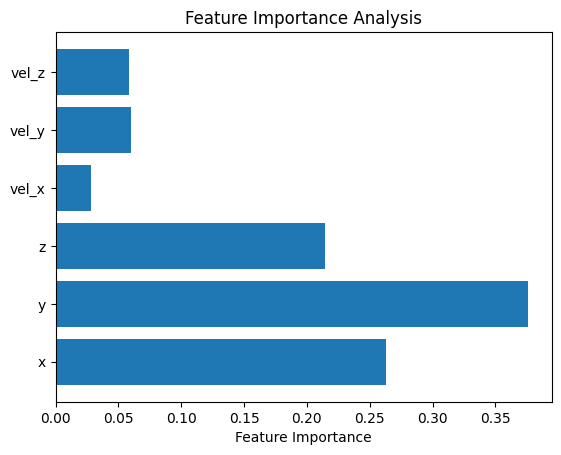

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.125, 1: 0.96875, 2: 0.9425675675675675, 3: 0.9823943661971831}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensembl

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('t_data.csv')

# Add derived features
df['vel_x'] = df['x'].diff().fillna(0)
df['vel_y'] = df['y'].diff().fillna(0)
df['vel_z'] = df['z'].diff().fillna(0)

# Prepare the features and target variable
X = df[["x", "y", "z", "vel_x", "vel_y", "vel_z"]].iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with class weights
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "y", "z", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


In [140]:
x = [[4865,	11.19,	4.07]]
clf.predict(x)[0]

ValueError: X has 3 features, but RandomForestClassifier is expecting 6 features as input.

In [143]:
import numpy as np

# Initialize previous readings as a global variable
previous_readings = [4865,	11.19,	4.07]

# Function to calculate derived features
def calculate_derived_features(current_readings):
    global previous_readings
    vel_x = current_readings[0] - previous_readings[0]
    vel_y = current_readings[1] - previous_readings[1]
    vel_z = current_readings[2] - previous_readings[2]
    
    # Update previous readings
    previous_readings = current_readings
    
    return [vel_x, vel_y, vel_z]

def predict_posture(current_readings):
    # Calculate derived features
    derived_features = calculate_derived_features(current_readings)

    # Combine current readings and derived features
    input_features = current_readings + derived_features
    
    # Make prediction using the trained model
    prediction = clf.predict([input_features])
    return prediction

# Example current sensor readings
current_readings = [10, 20, 30]

# Predict posture
prediction = predict_posture(current_readings)
print("Predicted posture:", prediction)


Predicted posture: [2]


In [144]:
#small model 

Accuracy on test set: 1.000


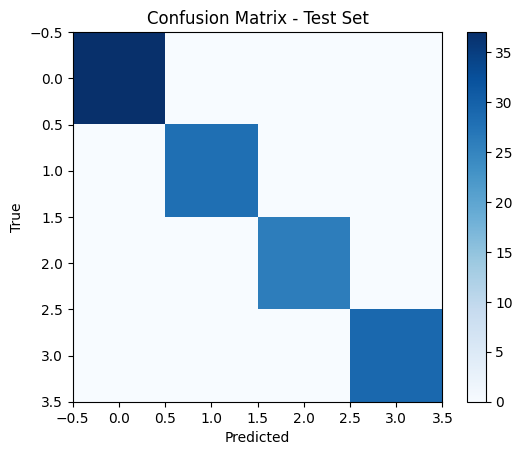

Cross-validation scores: [0.6625     1.         0.95       1.         0.98734177]


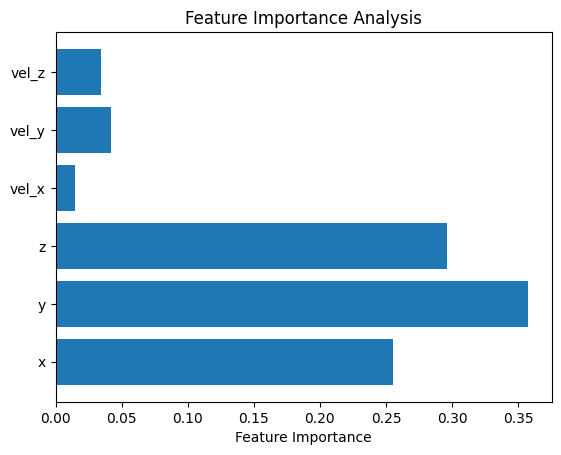

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.125, 1: 0.96875, 2: 0.9425675675675675, 3: 0.9823943661971831}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everywhereml.sklearn.ensemble,

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('t_data.csv')

# Add derived features
df['vel_x'] = df['x'].diff().fillna(0)
df['vel_y'] = df['y'].diff().fillna(0)
df['vel_z'] = df['z'].diff().fillna(0)

# Prepare the features and target variable
X = df[["x", "y", "z", "vel_x", "vel_y", "vel_z"]].iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x", "y", "z", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")


Accuracy on test set: 0.983


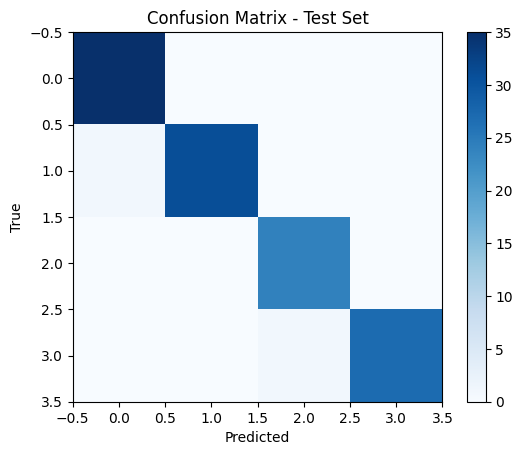

Cross-validation scores: [0.7721519  0.86075949 0.88607595 0.91139241 0.88461538]


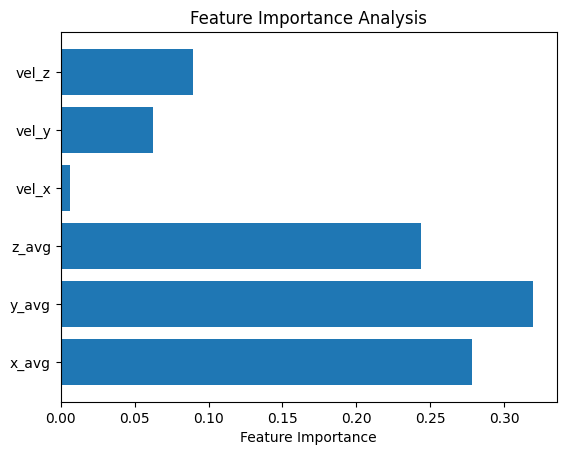

'try:\n    from time import ticks_us, ticks_diff\nexcept ImportError:\n    from time import time_ns\n\n    def ticks_us(): return int(time_ns() * 1000)\n    def ticks_diff(a, b): return a - b\n\nclass RandomForestClassifier:\n    """\n    # RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight={0: 1.1652542372881356, 1: 1.0110294117647058, 2: 0.9046052631578947, 3: 0.9548611111111112}, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=(\'criterion\', \'max_depth\', \'min_samples_split\', \'min_samples_leaf\', \'min_weight_fraction_leaf\', \'max_features\', \'max_leaf_nodes\', \'min_impurity_decrease\', \'random_state\', \'ccp_alpha\', \'monotonic_cst\'), max_depth=5, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=10, n_jobs=None, num_outputs=4, oob_score=False, package_name=everyw

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from everywhereml.sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('t_data.csv')

# Assuming the dataset has a timestamp column in seconds
# If not, create a simulated timestamp column for this example
df['timestamp'] = df.index * 0.5  # Simulate timestamps with 0.5-second intervals

# Function to average sensor data over a specified window
def average_sensor_data(df, window_size=3, interval=0.5):
    window_samples = int(window_size / interval)
    df['x_avg'] = df['x'].rolling(window=window_samples).mean()
    df['y_avg'] = df['y'].rolling(window=window_samples).mean()
    df['z_avg'] = df['z'].rolling(window=window_samples).mean()
    
    # Drop rows with NaN values created by the rolling operation
    df = df.dropna(subset=['x_avg', 'y_avg', 'z_avg'])
    
    return df

# Apply averaging function to the dataset
df = average_sensor_data(df)

# Add derived features
df['vel_x'] = df['x_avg'].diff().fillna(0)
df['vel_y'] = df['y_avg'].diff().fillna(0)
df['vel_z'] = df['z_avg'].diff().fillna(0)

# Prepare the features and target variable
X = df[['x_avg', 'y_avg', 'z_avg', 'vel_x', 'vel_y', 'vel_z']].iloc[1:].values
y = df.label.iloc[1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize the Random Forest classifier with smaller size
clf = RandomForestClassifier(
    n_estimators=10,  # Reduced number of estimators
    max_depth=5,  # Reduced maximum depth
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights_dict,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.3f}')

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Cross-validation scores
scores = cross_val_score(clf, X, y, cv=5)
print(f'Cross-validation scores: {scores}')

# Get feature importance
feature_importances = clf.feature_importances_

# Plot feature importance
features = ["x_avg", "y_avg", "z_avg", "vel_x", "vel_y", "vel_z"]
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Save the model to a file for deployment
clf.to_micropython_file("MyModel.py")
